In [1]:
import numpy as np
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pathlib
import h5py
import glob

In [2]:
cases = glob.glob('rayleigh_benard_*d_*')
cases = sorted(cases)

In [3]:
data = {}
for case in cases:
    file = case + '/scalars/scalars_s1.h5'
    f = h5py.File(file, 'r')
    t = f['scales/sim_time'][:]
    data_slice = (slice(None),0,0)
    data[case] = {}
    data[case]['Ra'] = float(case.split('_Ra')[1].split('_')[0])
    data[case]['t'] = t
    for key in f['tasks']:
        data[case][key] = f['tasks/'+key][data_slice]
    f.close()

In [4]:
bifurcation = {'Ra':[],'Re':[], 'τ':[], '3d':[]}
for case in data:
    bifurcation['Ra'].append(data[case]['Ra'])
    i_last_ten = np.argmin(np.abs(data[case]['t']-0.9*data[case]['t'][-1]))
    bifurcation['Re'].append(np.mean(data[case]['Re'][i_last_ten:]))
    taus = data[case]['|tau_d|']+data[case]['|tau_u|']+data[case]['|tau_b|']
    bifurcation['τ'].append(np.mean(taus[i_last_ten:]))
    bifurcation['3d'].append(('_3d_' in case))
for key in bifurcation:
    bifurcation[key] = np.array(bifurcation[key])

Text(0.5, 0, 'Rayleigh')

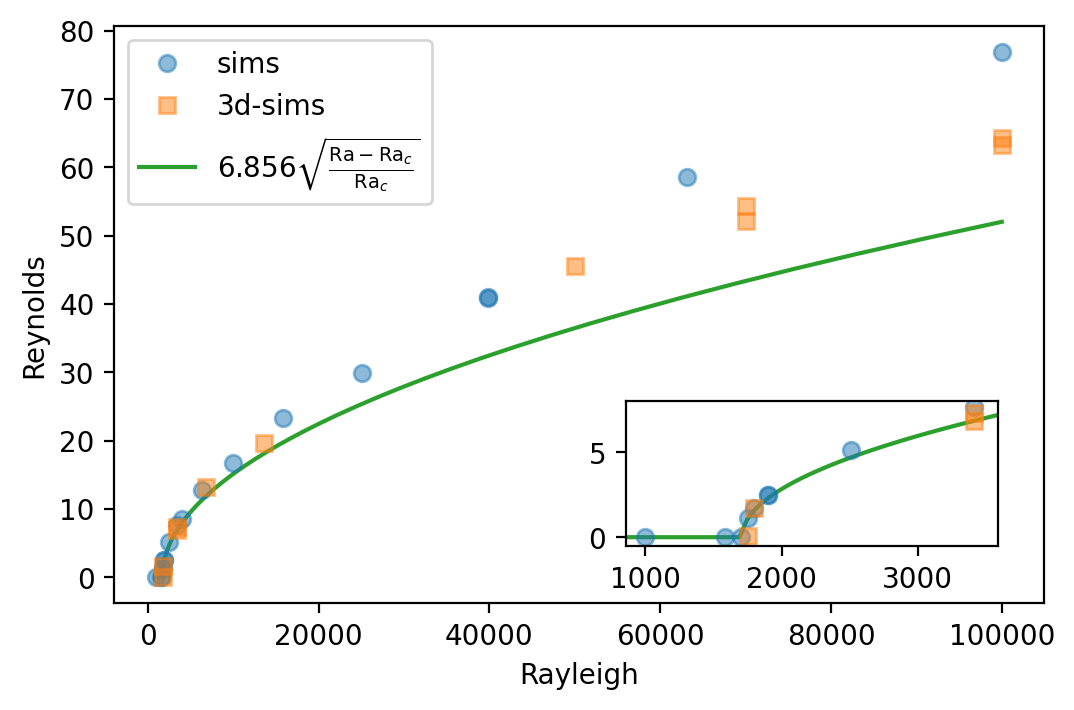

In [5]:
Re_2Rac = 6.856
Rac = 1708

fig, ax = plt.subplots(figsize=[6,6/1.6])
mask = bifurcation['3d']
ax.plot(bifurcation['Ra'][~mask], bifurcation['Re'][~mask], marker='o', linestyle='none', label='sims', alpha=0.5)
ax.plot(bifurcation['Ra'][mask], bifurcation['Re'][mask], marker='s', linestyle='none', label='3d-sims', alpha=0.5)


axins = ax.inset_axes([0.55, 0.1, 0.4, 0.25])
axins.plot(bifurcation['Ra'][~mask], bifurcation['Re'][~mask], marker='o', linestyle='none', label='sims', alpha=0.5)
axins.plot(bifurcation['Ra'][mask], bifurcation['Re'][mask], marker='s', linestyle='none', label='sims', alpha=0.5)
axins.set_xlim(0.5*Rac, 2.1*Rac)
axins.set_ylim(-0.5, 8)

Ras = np.linspace(0.5*Rac, 2.1*Rac) #np.geomspace(np.min(bifurcation['Ra']), np.max(bifurcation['Ra']))
Res = np.zeros_like(Ras)
mask = np.where(Ras>Rac)
Res[mask] = np.sqrt(Ras[mask]/Rac-1)*Re_2Rac
66
axins.plot(Ras, Res, label=r'$\sqrt{Ra/Ra_c}$', zorder=0)

Ras = np.geomspace(np.min(bifurcation['Ra']), np.max(bifurcation['Ra']))
Res = np.zeros_like(Ras)
mask = np.where(Ras>Rac)
Res[mask] = np.sqrt(Ras[mask]/Rac-1)*Re_2Rac
ax.plot(Ras, Res, label=f'{Re_2Rac}'+r'$\sqrt{\frac{\text{Ra}-\text{Ra}_c}{\text{Ra}_c}}$', zorder=0)

ax.legend()

ax.set_ylabel('Reynolds')
ax.set_xlabel('Rayleigh')

Text(0.5, 0, 'Ra/Ra$_c$')

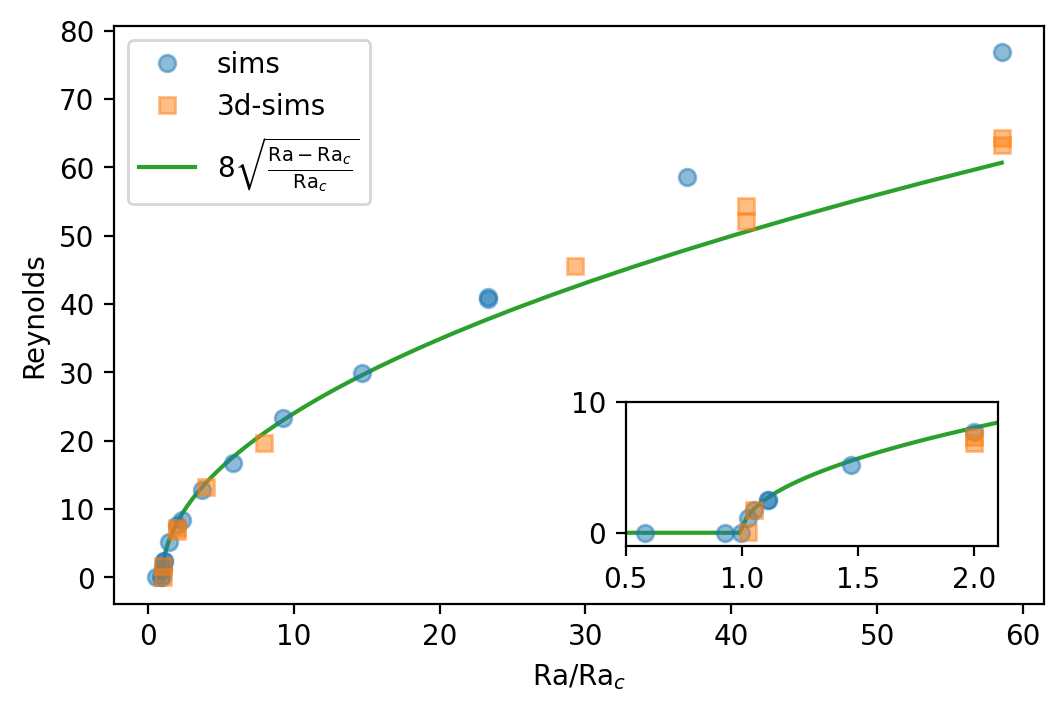

In [11]:
Rac = 1708
Re_2Rac = 8

fig, ax = plt.subplots(figsize=[6,6/1.6])
mask = bifurcation['3d']
ax.plot(bifurcation['Ra'][~mask]/Rac, bifurcation['Re'][~mask], marker='o', linestyle='none', label='sims', alpha=0.5)
ax.plot(bifurcation['Ra'][mask]/Rac, bifurcation['Re'][mask], marker='s', linestyle='none', label='3d-sims', alpha=0.5)


axins = ax.inset_axes([0.55, 0.1, 0.4, 0.25])
mask = bifurcation['3d']
axins.plot(bifurcation['Ra'][~mask]/Rac, bifurcation['Re'][~mask], marker='o', linestyle='none', label='sims', alpha=0.5)
axins.plot(bifurcation['Ra'][mask]/Rac, bifurcation['Re'][mask], marker='s', linestyle='none', label='3d-sims', alpha=0.5)
axins.set_xlim(0.5, 2.1)
axins.set_ylim(-1, 10)


Ras = np.linspace(0.5*Rac, 2.1*Rac) #np.geomspace(np.min(bifurcation['Ra']), np.max(bifurcation['Ra']))
Res = np.zeros_like(Ras)
mask = np.where(Ras>Rac)
Res[mask] = np.sqrt(Ras[mask]/Rac-1)*Re_2Rac

axins.plot(Ras/Rac, Res, label=r'$\sqrt{Ra/Ra_c}$', zorder=0)

Ras = np.geomspace(np.min(bifurcation['Ra']), np.max(bifurcation['Ra']))
Res = np.zeros_like(Ras)
mask = np.where(Ras>Rac)
Res[mask] = np.sqrt(Ras[mask]/Rac-1)*Re_2Rac
ax.plot(Ras/Rac, Res, label=f'{Re_2Rac}'+r'$\sqrt{\frac{\text{Ra}-\text{Ra}_c}{\text{Ra}_c}}$', zorder=0)

ax.legend()

ax.set_ylabel('Reynolds')
ax.set_xlabel('Ra/Ra$_c$')

In [7]:
for Ra, Re in zip(bifurcation['Ra'], bifurcation['Re']):
    print(f'Ra = {Ra:.3e}, Ra/Rac = {Ra/Rac:4.1f}, Re = {Re:.3e}')


Ra = 1.000e+03, Ra/Rac =  0.6, Re = 1.451e-11
Ra = 1.000e+04, Ra/Rac =  5.9, Re = 1.673e+01
Ra = 1.000e+05, Ra/Rac = 58.5, Re = 7.683e+01
Ra = 1.585e+03, Ra/Rac =  0.9, Re = 2.190e-05
Ra = 1.585e+04, Ra/Rac =  9.3, Re = 2.337e+01
Ra = 1.700e+03, Ra/Rac =  1.0, Re = 1.860e-04
Ra = 1.750e+03, Ra/Rac =  1.0, Re = 1.152e+00
Ra = 1.800e+03, Ra/Rac =  1.1, Re = 1.706e+00
Ra = 1.900e+03, Ra/Rac =  1.1, Re = 2.464e+00
Ra = 1.900e+03, Ra/Rac =  1.1, Re = 2.464e+00
Ra = 2.512e+04, Ra/Rac = 14.7, Re = 2.988e+01
Ra = 2.512e+03, Ra/Rac =  1.5, Re = 5.146e+00
Ra = 3.416e+03, Ra/Rac =  2.0, Re = 7.664e+00
Ra = 3.981e+03, Ra/Rac =  2.3, Re = 8.464e+00
Ra = 3.981e+04, Ra/Rac = 23.3, Re = 4.081e+01
Ra = 3.981e+04, Ra/Rac = 23.3, Re = 4.101e+01
Ra = 6.310e+03, Ra/Rac =  3.7, Re = 1.280e+01
Ra = 6.310e+04, Ra/Rac = 36.9, Re = 5.854e+01
Ra = 1.366e+04, Ra/Rac =  8.0, Re = 1.964e+01
Ra = 1.750e+03, Ra/Rac =  1.0, Re = 7.985e-02
Ra = 1.800e+03, Ra/Rac =  1.1, Re = 1.703e+00
Ra = 1.000e+05, Ra/Rac = 58.5, Re 

In [8]:
keys = ['|div_u|', '|tau_u|', '|tau_b|', 'Re']
for key in keys:
    print(key)
    for case in cases:
        print(f"     {case:45s}, " \
              f"{np.min(data[case][key]):10.2e}, " \
              f"{np.mean(data[case][key]):10.2e}, " \
              f"{np.max(data[case][key]):10.2e}")

|div_u|
     rayleigh_benard_2.5d_Ra1.000e+03_Nz8_Nx64    ,   0.00e+00,   8.49e-22,   1.60e-20
     rayleigh_benard_2.5d_Ra1.000e+04_Nz32_Nx256  ,   0.00e+00,   1.49e-16,   3.06e-16
     rayleigh_benard_2.5d_Ra1.000e+05_Nz64_Nx512  ,   0.00e+00,   2.07e-16,   5.07e-16
     rayleigh_benard_2.5d_Ra1.585e+03_Nz8_Nx64    ,   0.00e+00,   4.49e-21,   2.66e-20
     rayleigh_benard_2.5d_Ra1.585e+04_Nz32_Nx256  ,   0.00e+00,   1.63e-16,   2.94e-16
     rayleigh_benard_2.5d_Ra1.700e+03_Nz8_Nx64    ,   0.00e+00,   8.58e-21,   2.67e-20
     rayleigh_benard_2.5d_Ra1.75e3_Nz16_Nx128     ,   0.00e+00,   4.34e-18,   2.96e-17
     rayleigh_benard_2.5d_Ra1.8e3_Nz16_Nx128      ,   0.00e+00,   1.95e-17,   9.37e-17
     rayleigh_benard_2.5d_Ra1.9e3_Nz8_Nx32_a4.0   ,   0.00e+00,   2.53e-17,   6.22e-17
     rayleigh_benard_2.5d_Ra1.9e3_Nz8_Nx64        ,   0.00e+00,   2.12e-17,   5.58e-17
     rayleigh_benard_2.5d_Ra2.512e+04_Nz32_Nx256  ,   0.00e+00,   1.82e-16,   4.47e-16
     rayleigh_benard_2.5d_Ra2.512e3

(1e-06, 0.1)

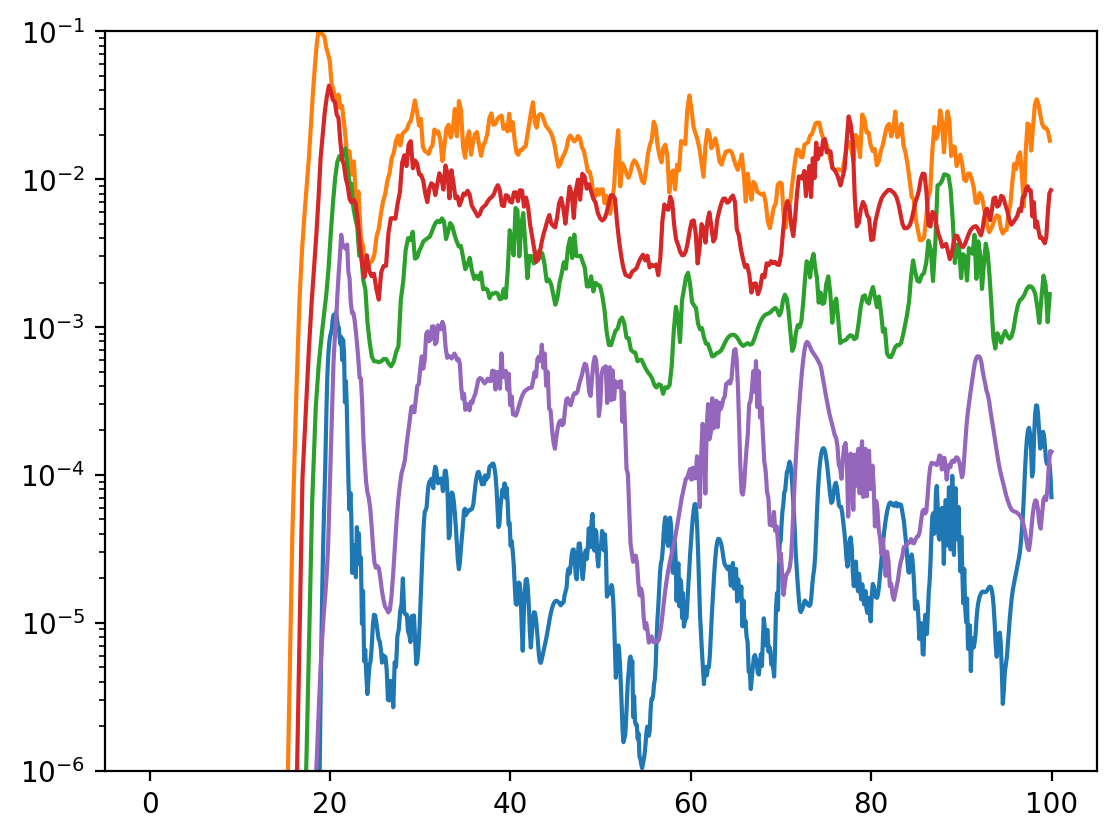

In [9]:
cs = ['rayleigh_benard_3d_Ra1e5_Nz64_Nx256_Ny256_a4.0', 
      'rayleigh_benard_3d_Ra1e5_Nz32_Nx128_Ny128_a4.0', 
      'rayleigh_benard_3d_Ra5e4_Nz32_Nx128_Ny128_a4.0',
      'rayleigh_benard_3d_Ra7e4_Nz32_Nx128_Ny128_a4.0',
      'rayleigh_benard_3d_Ra7e4_Nz48_Nx192_Ny192_a4.0']

fig, ax = plt.subplots()
for c in cs:
    ax.plot(data[c]['t'], data[c]['|tau_u|'])
ax.set_yscale('log')
ax.set_ylim(1e-6, 1e-1)